<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals + Milestone Project : BitPredict

Lets write code to predict the price of Bitcoin based on the historical price of Bitcoin

# Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-01 11:19:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-09-01 11:19:25 (11.7 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
import pandas as pd
# Read in our bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" ,
parse_dates = ["Date"] ,  # parse_dates parametresi, belirli sütunların tarih ve saat olarak ayrılması gerektiğini belirtir. Bu durumda, "Date" sütunu tarih ve saat olarak ayrılacak.
index_col = ["Date"]     # index_col parametresi, veri çerçevesinin hangi sütununun endeks (indeks) olarak kullanılacağını belirtir. Bu durumda, "Date" sütunu endeks olarak kullanılacak, yani her satırın bir tarih ve saat indeksi olacak.
)
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

In [5]:
8*365  # We have data into 8 years

2920

We have collected the historical price of bitcoin for the past 8 years but there is 2787 samples.

Typically deep learning models usually like lots and lots and lost of samples ( where lots and lots and lots can be thousand to tens of thousand to millions )

A smaller number of samples is something you will often run into with time series problems.

**Note**: The seasionality of a time series dataset is referred as the number of samples per year. So for our bitcoin data it has a seasionality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.


In [6]:
# Only want closing price for each day

bitcoin_prices = pd.DataFrame( df["Closing Price (USD)"] ).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


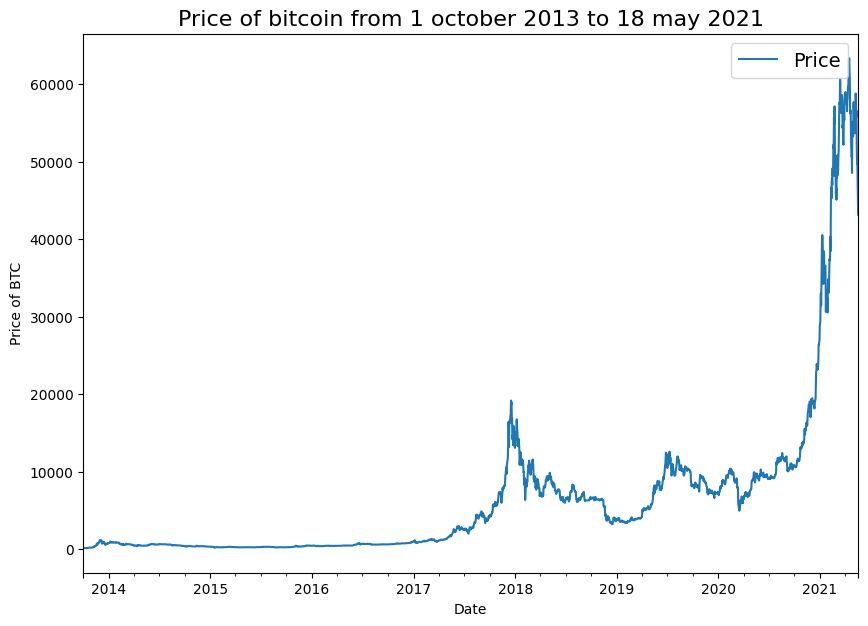

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = ( 10 , 7 ))
plt.ylabel("Price of BTC")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14);

# Read CSV files with Python

In [8]:
import csv
from datetime import datetime
timesteps = []  # For our date variables.
btc_price = []
# r means read and f means file
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader = csv.reader(f , delimiter = "," )  # Datamızı raw formatta açarsak variableların virgüllerle ayrıldığını görüyoruz bu yüzden delimiter ı virgüle eşitlememiz gerek
  next(csv_reader) # Skip first line(this gets rid of the column titles)(Yani Closing Price (USD)	24h Open (USD) gibi headerları pas geçiyor. )
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] , "%Y-%m-%d"))  # Burda aslında line[1] bizim date variablelarımız datamızdaki o date variablelarını alıyoruz. %Y : year , %m : month , %d : date. Get the dates as dates (not string)
    btc_price.append(float(line[2]))  # Get the closing price as float

# View the firs 10 of each
timesteps[ : 10] , btc_price[ : 10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

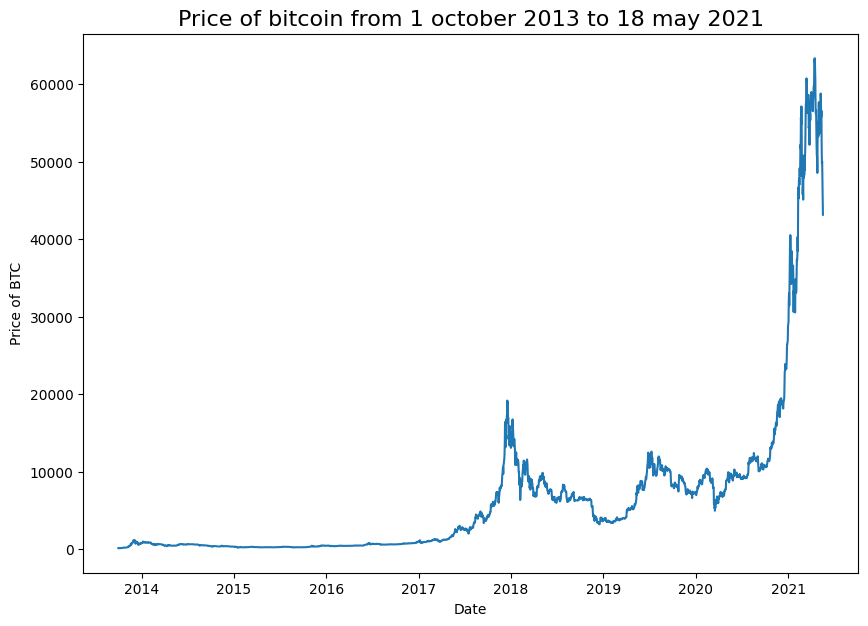

In [9]:
# Plot our python csv file
plt.figure(figsize = (10 , 7))
plt.plot(timesteps ,
         btc_price
         )
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16);


## Format data part 1 : Create train and test sets of our data

### Create train and test sets with time series data (wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()  #.index dediğimizde direkt date kısmını alıyoruz orayı index olarak çekmiştik yukarda.
prices = bitcoin_prices["Price"].to_numpy()
timesteps[ : 10] , prices[ : 10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(timesteps , # Dates
                                                       prices , # BTC prices
                                                       test_size = 0.2 ,
                                                       random_state  = 42
                                                       )
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((2229,), (558,), (2229,), (558,))

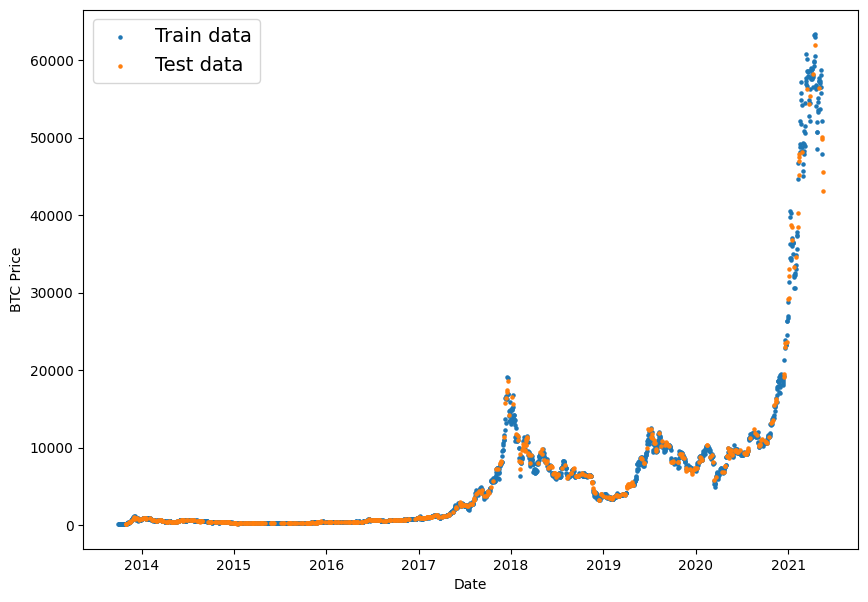

In [12]:
# Lets plot wrong train and test splits
plt.figure(figsize = ( 10 , 7 ))
plt.scatter(X_train , y_train , s = 5 , label = "Train data")
plt.scatter(X_test , y_test , s = 5 , label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train/test sets for time series (the right way)

#### train_test_split kullandıgımızda biz train ve test datamızı random sekilde olusturuyoruz yani shuffle etmis oluyoruz. Fakat biz time series problemlerinde future predict edecegimiz icin train datamızı bi yerde kesip tam ondan sonrasını test datamız yapmamız gerekiyor. Biz kendimiz bir future data olusturamayız zaten olusturabilsek bunları yapmamıza ihtiyacımız kalmazdı. Bu yüzden en eski tarihten belli bir zamana kadar train datamızı yapıcaz ve sonrasını da test datamız olarak belirleyeceğiz. Yani test datamızı aslında future gibi düsüneceğiz ve modelimiz ne kadar iyi calısıyor onu test edeceğiz.

In [13]:
# Create train/test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train , 20% test - you can change these values as needed , e.g. 90/10 or 95/5

# Create train data splits (everything before splits)
X_train , y_train = timesteps[ : split_size ] , prices[ : split_size]

# Create test data splits
X_test , y_test = timesteps[ split_size : ] , prices[ split_size : ]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

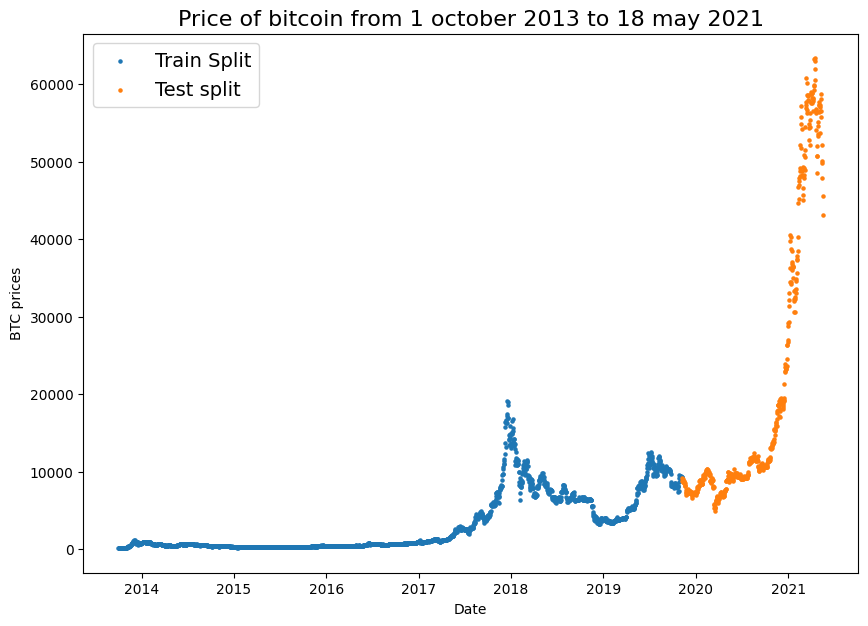

In [14]:
# Plot right splits
plt.figure(figsize = ( 10 , 7))
plt.scatter(X_train , y_train , s = 5 , label = "Train Split")
plt.scatter(X_test , y_test , s = 5 , label = "Test split")
plt.xlabel("Date")
plt.ylabel("BTC prices")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

In [15]:
## Create a function to plot time series data

def plot_time_series(timesteps , values , format = "." , start = 0 , end = None , label = None):
  """
  Plots timesteps (a series of points in time) againts values (a series of values across timesteps)

  Parameters
  ----------------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot , default "."
  start : where to start plot (setting a value will index from start of timesteps and values)
  end : where to end plot ( similar to start but for end)
  label : label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end] , values[start:end] , format , label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) # Make label bigger
  plt.grid(True)


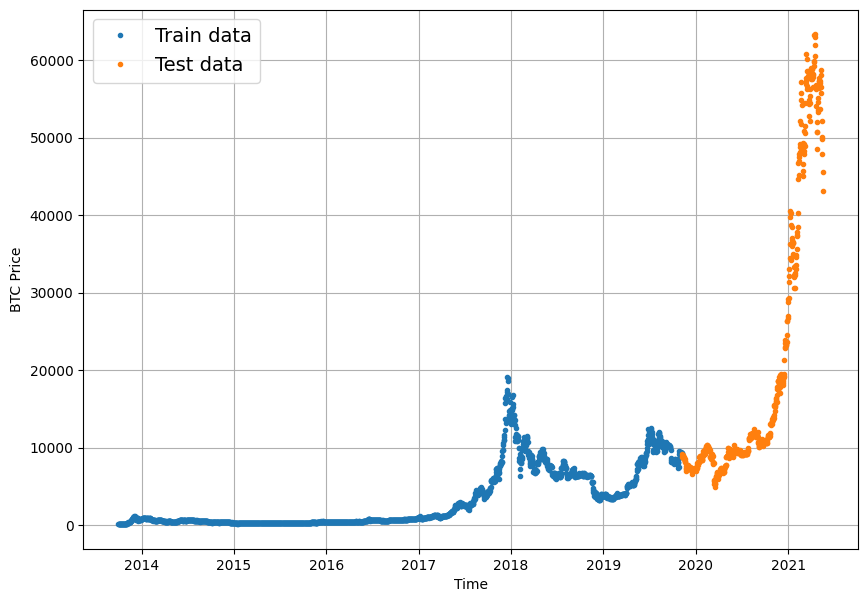

In [16]:
# Test out our plotting function
plt.figure(figsize = ( 10 , 7 ))  # Figure ü fonksiyon içinde kullanmamalıyız . matplotlib tidbit bu.
plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , label = "Test data")


## Modelling experiments

We have got some bitcoin historical data , to model it , lets run a series of modelling experiments and see which model performs best

Terms to be familiar with:

* Horizon = number of timesteps into the future we're going to predict


* Window size = number of timesteps we're going to use to predict horizon


Modelling experiments we're running:

* 0 - Naïve model (baseline)
* 1 - Dense model, horizon = 1, window = 7
* 2 - Same as 1, horizon = 1, window = 30
* 3 - Same as 1, horizon = 7, window = 30
* 4 - Conv1D
* 5 - LSTM
* 6 - Same as 1 (but with multivariate data)
* 7 - N-BEATs Algorithm
* 8 - Ensemble (multiple models optimized on different loss functions)
* 9 - Future prediction model (model to predict future values)
* 10 - Same as 1 (but with turkey 🦃 data introduced)

## Model 0 : Naive forcast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1



In [17]:
# Create a naive forcast
naive_forcast = y_test[ : -1]
# Burda yukarıda yazdıgımızı yaptık aslında. naive forcast , y_testteki  için en sondaki y_test valuesunu sildik.

naive_forcast[ : 10 ] , naive_forcast[-10 : ]

# Aşağıdaki değerler aslında bizim naive_forcast predictionlarımız. Yani naive forcast 45604.615 bu değeri predict etmiş ama actual valuesu y_testin içindeki 43144.471. Yani y_testteki actual valueyu bir önceki value olarak predict ediyor.

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [18]:
y_test[-10 : ]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

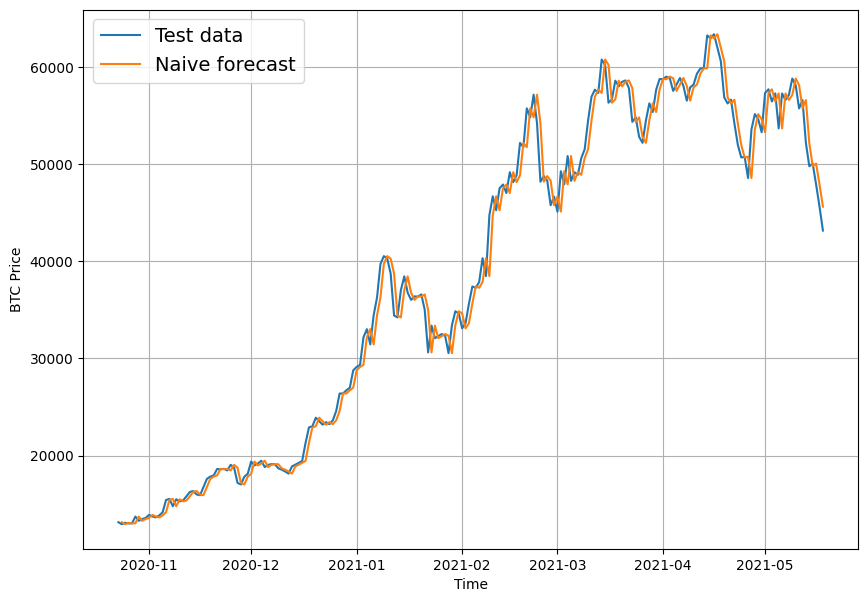

In [19]:
# Plot naive forecast
plt.figure(figsize = ( 10 , 7))
#plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , format = "-" , start = 350 , label = "Test data")
plot_time_series(timesteps = X_test[ 1 : ] , values = naive_forcast , format = "-" , start = 350 , label = "Naive forecast")
# We get everything after the first index with X_test[ 1 : ], bunu yapmak zorundayız çünkü naive forcastta son variable ı cut off ettik. Yani test datadan 1 eksik variable a sahip.


# Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autogoregressive come up? link : https://otexts.com/fpp3/simple-methods.html

# Our data is non-seasonal

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8 : https://otexts.com/fpp3/accuracy.html



In [20]:
import tensorflow as tf

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true , y_pred):
  """
  Implementing MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs( y_true - y_pred ))  # This is actually basic MAE (mean absolute error). abs mutlak değer.

  # Find MAE of naive forecast ( no seasonality )
  mae_naive_no_season = tf.reduce_mean(tf.abs( y_true[ 1 : ] - y_true[ : -1 ]  ))   # [ : -1]  means that  a new sequence that starts from the beginning and includes all elements except the last one.
  # [ 1 : ] means that ilk element hariç datanın hepsini alıyoruz.
  # Our seasionality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

  # Biz burda direkt aslında bütün modellerimizi naive forecasta göre evaluate edeceğimiz bir evaluation metrics oluşturduk. Biz az önce naive forecast modeli oluşturduğumuz için bu fonksiyonun içine y_pred olarak naive forecast predictionlarımızı gönderdiğimizde 1 değerini alıcaz. Keynote da >1 olunca naive forecasttan daha iyi demesinin sebebi de bu. Biz başka bir modeli MASE ile evaluate ettiğimizde naive forecast modelinden iyi mi yoksa kötü mü test edicez.


In [22]:
mean_absolute_scaled_error( y_true = y_test[ 1 : ] , y_pred = naive_forcast ).numpy()

0.9995699939182624

# All of our evaluation metrics in one function

In [23]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }







In [24]:
naive_results = evaluate_preds( y_true = y_test[ 1 : ] , y_pred =  naive_forcast)
naive_results
# Mae de çıkan sonuç bize y_testteki real valuelarımızın predictionlarda ortalama olarak ne kadar saptıgını söylüyor.
# y_test aslında modelimiz hakkında sadece küçük bir hint veriyor çünkü y_test datamızdaki değerler gelecekteki değerler değil yine past değerlere bakıyoruz.

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

# Other models you can use for baselines and for actual forecasts

We are focused on tensorflow and deep learning.

However there are plenty of other styles of time series forecasting models you may want to experiment with : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format data part 2 : Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

Windowing for one week:
[ 0 , 1 , 2 , 3 , 4 , 5 , 6] -> [7]   (We have dataset like this 0 1 2(these are days in one week) , and we want to predict the next day which is [7]

[ 1 , 2 , 3 , 4 , 5 , 6 , 7] -> [8]   and if we want to predict 8. day , we will do it like this.

[ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] -> [9]  and this is for prediction of 9. day  

horizon is the output size , window is the input size.


In [25]:
# What we want to do with our bitcoin data?
print(f" We want to use this : {btc_price[ : 7]} , to predict this : {btc_price[7]}")

# First part is our datas and the second one is our labels

 We want to use this : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] , to predict this : 123.033


In [26]:
# Lets setup global variables for window and horizon size
HORIZON = 1  # Predict next 1 day
WINDOW_SIZE = 7  # Use the past 7 days (1 week) of bitcoin data to make the prediction

In [27]:
# Create function to label windowed data
def get_labelled_windows( x , horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  e.g. if horizon = 1
  Input =  [ 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ] -> Output = ( [ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , [ 7 ] )  Yani outputu da inputun icinde alıyoruz sonrasında ayırıyoruz ve bizim outputumuz datamızı ve labelımızı iceren bir tuple olarak dönüyor.
  """
  return x[ :  ,  : -horizon ] ,  x[ : , -horizon : ] # For first x , get all rows and for columns , get all except last one(last one is our label) , For second x , get all rows and for columns , get just the last element(which is our label)

In [28]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window , test_label
# tf.range(8) : Bu ifade, 0 dan 7 ye kadar olan ardışık sayıları içeren bir tensörü oluşturur. TensorFlow'un tf.range() işlevi ardışık bir sayı dizisi oluşturmanızı sağlar.
# tf.expand_dims(tf.range(8) + 1, axis=0): Bu adım, önceki tensörü boyutunu genişleterek 2B bir tensöre dönüştürür. tf.expand_dims() işlevi, belirli bir eksen boyunca boyut eklemek için kullanılır. Bu durumda, axis=0 ile, yeni bir boyut eklenerek satır boyutu artırılır. Bu işlem sonucunda, örneğin, [1, 2, 3, 4, 5, 6, 7, 8] dizisi [1, 8] boyutlarında bir tensöre dönüşecektir.
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


We have got a way to label our windowed data.

However , this only works on a small scale.

We need a way to do the above across our entire time series .

We could do this with python for loops , however , for large time series , that would be quite slow.

To speed things up , we will leverage numpy's array indexing

 Our function will:

 1. Create a window step of spesific window size ( e.g. [ 0, 1 , 2 , 3 , 4 , 5 , 6 ]  )
 2. Use numpy indexing to create a 2D array of multiple window steps, for example:

 [ [ 0, 1 , 2 , 3 , 4 , 5 , 6 ] ,

 [ 1 , 2 , 3 , 4 , 5 , 6 , 7] ,

 [ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] ]

 3. Uses the 2D array of multiple window steps (from step 2 ) to index on a target series ( e.g. the historical prices of bitcoin) .
 4. Uses our ' get_labelled_windows() ' function we created above to turn the window steps into windows with specified horizon

Our algorithm is sliding windows


In [29]:
import numpy as np

In [30]:
# Create a function to view numpy arrays as windows
def make_windows( x , window_size = WINDOW_SIZE , horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of a window_size with horizon size labels.
  """
  # 1. Create a window of spesific window_size ( add horizon on the end for labelling later )
  window_step = np.expand_dims(np.arange(window_size + horizon) , axis = 0)   # window_size + horizon kadar 0 dan başlayan liste oluşturur.

  # 2. Create a 2D array of multiple window steps ( minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)) , axis = 0).T    #  (window_size + horizon - 1) bu kısım datamızın en sonuna geldiğinde durmak için. .T for transpose. Create 2D array of windows of size window_size
  #print(f"Window indexes : {window_indexes , window_indexes.shape }")

  # 3. Index on the target array ( a time series ) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows , labels = get_labelled_windows(windowed_array , horizon = horizon)
  return windows , labels



In [31]:
full_windows , full_labels = make_windows(prices)
len(full_windows) , len(full_labels)  # Price dan 7 eksik çünkü bizim windowumuz 8 elementten olusuyo bu yüzden son 7 elemanı dahil etmiyoruz windowlarımıza. Bunu sağlayan kısım da (window_size + horizon - 1) bu aslında.

(2780, 2780)

In [32]:
len(prices)

2787

In [33]:
# Viewing the first 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i]} , ->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] , ->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] , ->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] , ->  Label : [125.96116]


# There is a function which does similar to the above in tf.keras.preprocessing.timeseries_dataset_from_array

## Turning windows into training and test sets. Training ve test setlerimizi windowlarımızı oluşturduktan sonra yapıyoruz.

In [34]:
# Make the train/test splits with function

def make_train_test_splits(windows , labels , test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * ( 1 - test_split )) # this will be default to 80% train / 20% test
  train_windows = windows[ : split_size ]
  train_labels = labels[ : split_size]
  test_windows = windows[ split_size : ]
  test_labels = labels[ split_size : ]

  return train_windows , test_windows , train_labels , test_labels



In [35]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [36]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# Make a modelling checkpoint

Because our modelling performance will fluctuate from experiment to experiment , we are going to write a model checkpoint so we can compare apples to apples.

More spesifically , we want to compare each of our models's best performances againts the other model's best performances.

For example if our model performs the best on epoch 55 (  but we are training for 100 epochs ) , we want to load and evaluate the model saved on epoch 55.

In [37]:
import os

def create_model_checkpoint(model_name , save_path = "model_experiments" ):
  return tf.keras.callbacks.ModelCheckpoint( filepath = os.path.join(save_path , model_name) , verbose = 0 , save_best_only = True)


# Model : Simple Dense Model ( window = 7 , horizon = 1)

Our firs deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and relu.
* An output layer with linear activation ( or no activation ).
* Adam optimizer and MAE loss function.
* Batch size of 128 (previously we used 32 but here we have number data and smaller data so we can use 128 for fitting fast). ( Datamızın icindeki verilerin büyüklügü cok degilse batch size arttırıyoruz bizim datamız sayılardan olusuyor bu yüzden arttırdık cok az yer kaplıyor.)
* 100 epochs.

Why these values?

I picked them out of experimentation.

** Note: **
* Hyperparameters : values a machine learning practitioner can adjust themselves.

* Parameters : values a model learns on its own



In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model

model_1 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu") ,
        layers.Dense( HORIZON , activation = "linear")  # Linear activation is the same as having no activation
    ]
  ,  name = "model_1_dense"
)
# Compile a model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )
# Fit the model
hist_1 = model_1.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    verbose = 1 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint( model_name = model_1.name )]

)


Epoch 1/100
 1/18 [>.............................] - ETA: 45s - loss: 2993.2358 - mae: 2993.2358

18/18 [==============================] - 5s 110ms/step - loss: 1139.7083 - mae: 1139.7083 - val_loss: 2650.4348 - val_mae: 2650.4348
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 302.2683 - mae: 302.2683

18/18 [==============================] - 1s 71ms/step - loss: 281.6589 - mae: 281.6589 - val_loss: 1004.6578 - val_mae: 1004.6578
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 197.8795 - mae: 197.8795

18/18 [==============================] - 1s 69ms/step - loss: 192.8513 - mae: 192.8513 - val_loss: 966.5236 - val_mae: 966.5236
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 177.7250 - mae: 177.7250

18/18 [==============================] - 1s 71ms/step - loss: 177.7250 - mae: 177.7250 - val_loss: 945.0124 - val_mae: 945.0124
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 179.8460 - mae: 179.8460

18/18 [==============================] - 1s 75ms/step - loss: 172.1272 - mae: 172.1272 - val_loss: 936.1722 - val_mae: 936.1722
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 162.4021 - mae: 162.4021

18/18 [==============================] - 2s 90ms/step - loss: 166.3510 - mae: 166.3510 - val_loss: 901.6584 - val_mae: 901.6584
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 195.6400 - mae: 195.6400

18/18 [==============================] - 2s 96ms/step - loss: 159.8938 - mae: 159.8938 - val_loss: 885.0143 - val_mae: 885.0143
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 152.6393 - mae: 152.6393

18/18 [==============================] - 3s 196ms/step - loss: 153.7247 - mae: 153.7247 - val_loss: 828.9210 - val_mae: 828.9210
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 151.3985 - mae: 151.3985

18/18 [==============================] - 1s 71ms/step - loss: 150.1909 - mae: 150.1909 - val_loss: 803.7460 - val_mae: 803.7460
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 138.8644 - mae: 138.8644

18/18 [==============================] - 1s 63ms/step - loss: 145.5172 - mae: 145.5172 - val_loss: 779.6348 - val_mae: 779.6348
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 139.7907 - mae: 139.7907 - val_loss: 820.0794 - val_mae: 820.0794
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 136.7561 - mae: 136.7561 - val_loss: 790.1524 - val_mae: 790.1524
Epoch 13/100
12/18 [===================>..........] - ETA: 0s - loss: 130.3368 - mae: 130.3368

18/18 [==============================] - 1s 63ms/step - loss: 136.8078 - mae: 136.8078 - val_loss: 771.9946 - val_mae: 771.9946
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 130.7995 - mae: 130.7995

18/18 [==============================] - 1s 86ms/step - loss: 130.6169 - mae: 130.6169 - val_loss: 735.0020 - val_mae: 735.0020
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 126.8360 - mae: 126.8360

18/18 [==============================] - 2s 98ms/step - loss: 132.5998 - mae: 132.5998 - val_loss: 700.7329 - val_mae: 700.7329
Epoch 16/100
18/18 [==============================] - 0s 11ms/step - loss: 126.7270 - mae: 126.7270 - val_loss: 719.0852 - val_mae: 719.0852
Epoch 17/100
13/18 [====================>.........] - ETA: 0s - loss: 128.0415 - mae: 128.0415

18/18 [==============================] - 1s 79ms/step - loss: 126.7731 - mae: 126.7731 - val_loss: 686.3922 - val_mae: 686.3922
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 125.5362 - mae: 125.5362

18/18 [==============================] - 2s 89ms/step - loss: 122.2943 - mae: 122.2943 - val_loss: 671.4838 - val_mae: 671.4838
Epoch 19/100
18/18 [==============================] - 0s 15ms/step - loss: 121.8536 - mae: 121.8536 - val_loss: 678.1979 - val_mae: 678.1979
Epoch 20/100
18/18 [==============================] - 0s 17ms/step - loss: 120.3990 - mae: 120.3990 - val_loss: 677.5845 - val_mae: 677.5845
Epoch 21/100
11/18 [=================>............] - ETA: 0s - loss: 127.0589 - mae: 127.0589

18/18 [==============================] - 2s 112ms/step - loss: 123.1949 - mae: 123.1949 - val_loss: 649.4276 - val_mae: 649.4276
Epoch 22/100
18/18 [==============================] - 0s 11ms/step - loss: 119.0681 - mae: 119.0681 - val_loss: 667.9301 - val_mae: 667.9301
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 122.2938 - mae: 122.2938

18/18 [==============================] - 1s 45ms/step - loss: 123.1844 - mae: 123.1844 - val_loss: 648.3176 - val_mae: 648.3176
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 123.7607 - mae: 123.7607

18/18 [==============================] - 1s 35ms/step - loss: 120.6424 - mae: 120.6424 - val_loss: 640.5477 - val_mae: 640.5477
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 123.5580 - mae: 123.5580

18/18 [==============================] - 1s 35ms/step - loss: 118.5900 - mae: 118.5900 - val_loss: 626.9875 - val_mae: 626.9875
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 111.5881 - mae: 111.5881

18/18 [==============================] - 1s 34ms/step - loss: 116.7271 - mae: 116.7271 - val_loss: 624.7382 - val_mae: 624.7382
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 158.7406 - mae: 158.7406

18/18 [==============================] - 1s 35ms/step - loss: 117.5340 - mae: 117.5340 - val_loss: 620.1669 - val_mae: 620.1669
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 104.3263 - mae: 104.3263

18/18 [==============================] - 1s 34ms/step - loss: 113.5482 - mae: 113.5482 - val_loss: 613.9819 - val_mae: 613.9819
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8960 - mae: 109.8960

18/18 [==============================] - 1s 36ms/step - loss: 114.2579 - mae: 114.2579 - val_loss: 609.7515 - val_mae: 609.7515
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 125.4130 - mae: 125.4130

18/18 [==============================] - 1s 36ms/step - loss: 116.8792 - mae: 116.8792 - val_loss: 605.2724 - val_mae: 605.2724
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 111.3842 - mae: 111.3842 - val_loss: 617.1554 - val_mae: 617.1554
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5298 - mae: 111.5298 - val_loss: 610.8120 - val_mae: 610.8120
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4348 - mae: 112.4348 - val_loss: 669.7105 - val_mae: 669.7105
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3420 - mae: 112.3420 - val_loss: 622.8697 - val_mae: 622.8697
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 110.1105 - mae: 110.1105

18/18 [==============================] - 1s 53ms/step - loss: 110.9800 - mae: 110.9800 - val_loss: 593.6084 - val_mae: 593.6084
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 153.6716 - mae: 153.6716

18/18 [==============================] - 1s 36ms/step - loss: 111.7501 - mae: 111.7501 - val_loss: 593.0704 - val_mae: 593.0704
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 129.2891 - mae: 129.2891

18/18 [==============================] - 1s 34ms/step - loss: 109.2608 - mae: 109.2608 - val_loss: 590.0903 - val_mae: 590.0903
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 102.4201 - mae: 102.4201

18/18 [==============================] - 1s 37ms/step - loss: 110.0464 - mae: 110.0464 - val_loss: 588.7429 - val_mae: 588.7429
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2225 - mae: 109.2225 - val_loss: 599.9263 - val_mae: 599.9263
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2166 - mae: 111.2166 - val_loss: 627.7164 - val_mae: 627.7164
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5545 - mae: 109.5545 - val_loss: 594.3069 - val_mae: 594.3069
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8779 - mae: 111.8779 - val_loss: 692.9647 - val_mae: 692.9647
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 117.4553 - mae: 117.4553 - val_loss: 648.6738 - val_mae: 648.6738
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4307 - mae: 111.4307 - val_loss: 590.9884 - val_mae: 590.9884
Epoch 45/100
18/18 [============

18/18 [==============================] - 1s 43ms/step - loss: 112.1128 - mae: 112.1128 - val_loss: 577.3884 - val_mae: 577.3884
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5572 - mae: 111.5572 - val_loss: 650.3540 - val_mae: 650.3540
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 107.1324 - mae: 107.1324

18/18 [==============================] - 1s 50ms/step - loss: 112.7801 - mae: 112.7801 - val_loss: 576.6202 - val_mae: 576.6202
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6721 - mae: 116.6721 - val_loss: 581.1049 - val_mae: 581.1049
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9212 - mae: 109.9212 - val_loss: 688.6047 - val_mae: 688.6047
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 117.7142 - mae: 117.7142 - val_loss: 612.3398 - val_mae: 612.3398
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7655 - mae: 113.7655 - val_loss: 602.2733 - val_mae: 602.2733
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6316 - mae: 108.6316 - val_loss: 614.0873 - val_mae: 614.0873
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6977 - mae: 109.6977 - val_loss: 651.8569 - val_mae: 651.8569
Epoch 61/100
 1/18 [>...........

18/18 [==============================] - 1s 47ms/step - loss: 110.2590 - mae: 110.2590 - val_loss: 574.9431 - val_mae: 574.9431
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 108.0098 - mae: 108.0098 - val_loss: 616.7103 - val_mae: 616.7103
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2609 - mae: 114.2609 - val_loss: 606.6978 - val_mae: 606.6978
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6464 - mae: 107.6464 - val_loss: 589.4481 - val_mae: 589.4481
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 130.2634 - mae: 130.2634

18/18 [==============================] - 1s 34ms/step - loss: 107.4174 - mae: 107.4174 - val_loss: 572.3792 - val_mae: 572.3792
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 105.4761 - mae: 105.4761 - val_loss: 573.2589 - val_mae: 573.2589
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2150 - mae: 106.2150 - val_loss: 625.7213 - val_mae: 625.7213
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 118.5160 - mae: 118.5160 - val_loss: 814.2852 - val_mae: 814.2852
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 135.5616 - mae: 135.5616 - val_loss: 699.9003 - val_mae: 699.9003
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 118.6800 - mae: 118.6800 - val_loss: 579.1914 - val_mae: 579.1914
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4475 - mae: 111.4475 - val_loss: 586.9776 - val_mae: 586.9776
Epoch 72/100
18/18 [============

18/18 [==============================] - 1s 34ms/step - loss: 107.7125 - mae: 107.7125 - val_loss: 569.3767 - val_mae: 569.3767
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 106.9709 - mae: 106.9709 - val_loss: 570.8886 - val_mae: 570.8886
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 106.9824 - mae: 106.9824 - val_loss: 574.1689 - val_mae: 574.1689
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 105.9986 - mae: 105.9986 - val_loss: 595.7394 - val_mae: 595.7394
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 108.8483 - mae: 108.8483 - val_loss: 571.9907 - val_mae: 571.9907
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 93.7462 - mae: 93.7462

18/18 [==============================] - 1s 35ms/step - loss: 105.1948 - mae: 105.1948 - val_loss: 568.0856 - val_mae: 568.0856
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5277 - mae: 112.5277 - val_loss: 577.7969 - val_mae: 577.7969
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 113.1313 - mae: 113.1313 - val_loss: 660.4343 - val_mae: 660.4343
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1082 - mae: 112.1082 - val_loss: 574.4670 - val_mae: 574.4670
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8010 - mae: 106.8010 - val_loss: 577.4107 - val_mae: 577.4107
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 107.4964 - mae: 107.4964 - val_loss: 569.1312 - val_mae: 569.1312
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 105.0429 - mae: 105.0429 - val_loss: 587.6340 - val_mae: 587.6340
Epoch 88/100
18/18 [============

In [39]:
# Evaluate our model
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 609.3660 - mae: 609.3660


[609.365966796875, 609.365966796875]

In [40]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.0856 - mae: 568.0856


[568.0855712890625, 568.0855712890625]

## Making forecast with a model ( on the test dataset)

To make forecasts on the test dataset (these wont be actual forecasts , they are only psuedo forecasts because actual forecast are into the future ).  Test datamız da aslında gecmiste olan datalar oldugu icin sadece biz modelimiz hakkında nasıl calıstıgını görmek icin bunu future gibi kabul ediyoruz.)

In [41]:
model_1_pred = model_1.predict(test_windows)
model_1_pred

18/18 [==============================] - 0s 2ms/step


array([[ 8826.813 ],
       [ 8765.803 ],
       [ 9030.455 ],
       [ 8743.692 ],
       [ 8724.474 ],
       [ 8742.12  ],
       [ 8649.765 ],
       [ 8513.913 ],
       [ 8443.499 ],
       [ 8509.656 ],
       [ 8233.747 ],
       [ 8098.9194],
       [ 8063.6406],
       [ 7649.1743],
       [ 7301.273 ],
       [ 7288.029 ],
       [ 7079.931 ],
       [ 7182.385 ],
       [ 7156.974 ],
       [ 7438.9194],
       [ 7424.359 ],
       [ 7677.655 ],
       [ 7615.4097],
       [ 7404.2944],
       [ 7348.8145],
       [ 7299.668 ],
       [ 7216.324 ],
       [ 7353.1143],
       [ 7489.6216],
       [ 7526.529 ],
       [ 7552.3247],
       [ 7368.4097],
       [ 7244.686 ],
       [ 7189.773 ],
       [ 7168.77  ],
       [ 7218.981 ],
       [ 7092.7163],
       [ 7087.871 ],
       [ 6904.8726],
       [ 6594.781 ],
       [ 7295.608 ],
       [ 7206.564 ],
       [ 7107.099 ],
       [ 7286.473 ],
       [ 7269.548 ],
       [ 7197.939 ],
       [ 7211.0386],
       [ 7216

In [42]:
model_1_results = evaluate_preds( y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_1_pred ) )
model_1_results   # Now we are doing predictions with best weights because we load our model with ModelCheckpoint

{'mae': 568.0856,
 'mse': 1164428.8,
 'rmse': 1079.087,
 'mape': 2.536922,
 'mase': 0.99796903}

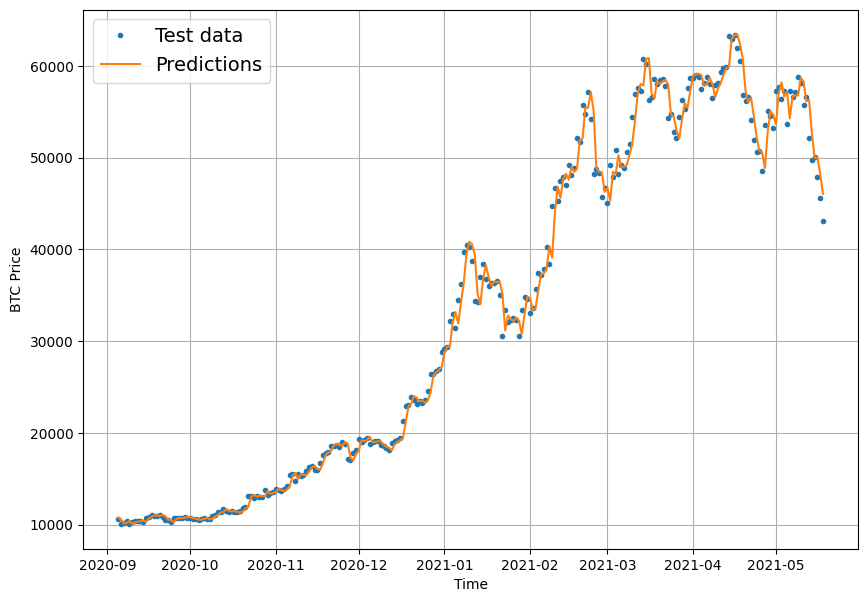

In [43]:
# Lets plot our model 1 predictions
offset = 300
plt.figure(figsize = ( 10 , 7 ))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : ,  0] , start = offset , label =  "Test data" )  # X_test kullanıyoruz çünkü windowların dimensionalityleri sebebiyle plot edemiyoruz. Sadece x_testte doğru indexleme yapmamız gerekiyor
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_1_pred , start = offset , format = "-" , label =  "Predictions" )

# Model 2 Dense : Window = 30 , Horizon = 1

In [44]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [45]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)


In [46]:
# Model 2 : Same as with model 1 but window size = 30
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_2_dense"
)
# Compile a model

model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_2 = model_2.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 10s - loss: 1785.4316 - mae: 1785.4316

18/18 [==============================] - 1s 47ms/step - loss: 632.5731 - mae: 632.5731 - val_loss: 1975.9203 - val_mae: 1975.9203
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 532.9689 - mae: 532.9689

18/18 [==============================] - 1s 36ms/step - loss: 271.2769 - mae: 271.2769 - val_loss: 1351.1858 - val_mae: 1351.1858
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 222.3450 - mae: 222.3450

18/18 [==============================] - 1s 34ms/step - loss: 225.4539 - mae: 225.4539 - val_loss: 1005.3545 - val_mae: 1005.3545
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 191.4751 - mae: 191.4751 - val_loss: 1022.7726 - val_mae: 1022.7726
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 183.4942 - mae: 183.4942 - val_loss: 1011.6082 - val_mae: 1011.6082
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 196.6472 - mae: 196.6472 - val_loss: 1085.7802 - val_mae: 1085.7802
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 203.8622 - mae: 203.8622

18/18 [==============================] - 1s 53ms/step - loss: 176.8963 - mae: 176.8963 - val_loss: 908.5209 - val_mae: 908.5209
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 165.5502 - mae: 165.5502 - val_loss: 965.5118 - val_mae: 965.5118
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 169.8677 - mae: 169.8677 - val_loss: 1047.5620 - val_mae: 1047.5620
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 234.4869 - mae: 234.4869

18/18 [==============================] - 1s 52ms/step - loss: 172.6866 - mae: 172.6866 - val_loss: 830.4388 - val_mae: 830.4388
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 148.7640 - mae: 148.7640 - val_loss: 975.9146 - val_mae: 975.9146
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 154.2272 - mae: 154.2272

18/18 [==============================] - 1s 51ms/step - loss: 159.9748 - mae: 159.9748 - val_loss: 785.2198 - val_mae: 785.2198
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 147.4402 - mae: 147.4402 - val_loss: 1138.7180 - val_mae: 1138.7180
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 253.5464 - mae: 253.5464

18/18 [==============================] - 1s 40ms/step - loss: 152.7289 - mae: 152.7289 - val_loss: 777.4523 - val_mae: 777.4523
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 197.0594 - mae: 197.0594

18/18 [==============================] - 1s 36ms/step - loss: 156.4838 - mae: 156.4838 - val_loss: 750.1938 - val_mae: 750.1938
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 155.3671 - mae: 155.3671 - val_loss: 816.3757 - val_mae: 816.3757
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 155.6736 - mae: 155.6736 - val_loss: 1119.7914 - val_mae: 1119.7914
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 218.5608 - mae: 218.5608

18/18 [==============================] - 1s 35ms/step - loss: 157.1613 - mae: 157.1613 - val_loss: 725.6204 - val_mae: 725.6204
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 137.5488 - mae: 137.5488 - val_loss: 1055.6022 - val_mae: 1055.6022
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 149.1078 - mae: 149.1078 - val_loss: 818.8798 - val_mae: 818.8798
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 168.5830 - mae: 168.5830 - val_loss: 757.4738 - val_mae: 757.4738
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 105.1141 - mae: 105.1141

18/18 [==============================] - 1s 35ms/step - loss: 135.9957 - mae: 135.9957 - val_loss: 698.7283 - val_mae: 698.7283
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 139.3822 - mae: 139.3822 - val_loss: 720.4064 - val_mae: 720.4064
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 122.8941 - mae: 122.8941

18/18 [==============================] - 1s 35ms/step - loss: 129.5587 - mae: 129.5587 - val_loss: 693.6213 - val_mae: 693.6213
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 141.2681 - mae: 141.2681 - val_loss: 737.6009 - val_mae: 737.6009
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 144.9669 - mae: 144.9669 - val_loss: 701.5634 - val_mae: 701.5634
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 137.1777 - mae: 137.1777 - val_loss: 1120.6705 - val_mae: 1120.6705
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 178.4312 - mae: 178.4312

18/18 [==============================] - 1s 35ms/step - loss: 160.5573 - mae: 160.5573 - val_loss: 673.9289 - val_mae: 673.9289
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 144.2074 - mae: 144.2074 - val_loss: 775.9512 - val_mae: 775.9512
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 149.0497 - mae: 149.0497 - val_loss: 1029.1006 - val_mae: 1029.1006
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 192.5718 - mae: 192.5718

18/18 [==============================] - 1s 35ms/step - loss: 140.5321 - mae: 140.5321 - val_loss: 668.6591 - val_mae: 668.6591
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 148.6083 - mae: 148.6083 - val_loss: 1337.0980 - val_mae: 1337.0980
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 160.8005 - mae: 160.8005 - val_loss: 867.2175 - val_mae: 867.2175
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 139.7012 - mae: 139.7012 - val_loss: 710.7357 - val_mae: 710.7357
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 138.4684 - mae: 138.4684 - val_loss: 715.3895 - val_mae: 715.3895
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 134.6389 - mae: 134.6389 - val_loss: 694.9500 - val_mae: 694.9500
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 136.3369 - mae: 136.3369 - val_loss: 853.8603 - val_mae: 853.8603
Epoch 38/100
18/18 [==========

18/18 [==============================] - 1s 35ms/step - loss: 123.1151 - mae: 123.1151 - val_loss: 657.1578 - val_mae: 657.1578
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 121.0960 - mae: 121.0960 - val_loss: 727.1216 - val_mae: 727.1216
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 139.2448 - mae: 139.2448 - val_loss: 669.0322 - val_mae: 669.0322
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 136.1993 - mae: 136.1993 - val_loss: 737.4172 - val_mae: 737.4172
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 151.1585 - mae: 151.1585

18/18 [==============================] - 1s 35ms/step - loss: 141.1695 - mae: 141.1695 - val_loss: 651.3108 - val_mae: 651.3108
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0177 - mae: 119.0177 - val_loss: 738.8204 - val_mae: 738.8204
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 128.5688 - mae: 128.5688 - val_loss: 669.8292 - val_mae: 669.8292
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 120.5265 - mae: 120.5265 - val_loss: 742.5526 - val_mae: 742.5526
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 125.2575 - mae: 125.2575 - val_loss: 673.3223 - val_mae: 673.3223
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 122.7678 - mae: 122.7678 - val_loss: 848.3062 - val_mae: 848.3062
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 166.0236 - mae: 166.0236 - val_loss: 1075.4133 - val_mae: 1075.4133
Epoch 51/100
18/18 [==========

18/18 [==============================] - 1s 35ms/step - loss: 177.8677 - mae: 177.8677 - val_loss: 647.0059 - val_mae: 647.0059
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 131.3277 - mae: 131.3277 - val_loss: 796.2366 - val_mae: 796.2366
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 141.9025 - mae: 141.9025 - val_loss: 872.9321 - val_mae: 872.9321
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 141.2815 - mae: 141.2815 - val_loss: 702.3204 - val_mae: 702.3204
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 125.4690 - mae: 125.4690 - val_loss: 802.3702 - val_mae: 802.3702
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 122.2474 - mae: 122.2474 - val_loss: 842.6732 - val_mae: 842.6732
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 148.0599 - mae: 148.0599

18/18 [==============================] - 1s 36ms/step - loss: 158.6835 - mae: 158.6835 - val_loss: 630.5801 - val_mae: 630.5801
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 116.4165 - mae: 116.4165 - val_loss: 718.5128 - val_mae: 718.5128
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 121.3354 - mae: 121.3354 - val_loss: 658.2136 - val_mae: 658.2136
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6947 - mae: 117.6947 - val_loss: 888.7239 - val_mae: 888.7239
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 133.1255 - mae: 133.1255 - val_loss: 721.4291 - val_mae: 721.4291
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 99.9100 - mae: 99.9100

18/18 [==============================] - 1s 70ms/step - loss: 125.1091 - mae: 125.1091 - val_loss: 625.2426 - val_mae: 625.2426
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 106.2618 - mae: 106.2618

18/18 [==============================] - 1s 51ms/step - loss: 119.0958 - mae: 119.0958 - val_loss: 624.4736 - val_mae: 624.4736
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 116.8092 - mae: 116.8092

18/18 [==============================] - 1s 48ms/step - loss: 118.6015 - mae: 118.6015 - val_loss: 624.2842 - val_mae: 624.2842
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 119.5451 - mae: 119.5451 - val_loss: 700.5084 - val_mae: 700.5084
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 117.9922 - mae: 117.9922 - val_loss: 669.0896 - val_mae: 669.0896
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 125.9377 - mae: 125.9377 - val_loss: 1252.7520 - val_mae: 1252.7520
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 171.8036 - mae: 171.8036 - val_loss: 725.9379 - val_mae: 725.9379
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 133.5096 - mae: 133.5096 - val_loss: 646.5707 - val_mae: 646.5707
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 119.5759 - mae: 119.5759 - val_loss: 687.9448 - val_mae: 687.9448
Epoch 73/100
18/18 [==========

18/18 [==============================] - 1s 34ms/step - loss: 116.4747 - mae: 116.4747 - val_loss: 622.7983 - val_mae: 622.7983
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 113.9063 - mae: 113.9063 - val_loss: 677.7646 - val_mae: 677.7646
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 64.6849 - mae: 64.6849

18/18 [==============================] - 1s 35ms/step - loss: 124.3100 - mae: 124.3100 - val_loss: 619.6827 - val_mae: 619.6827
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 124.4832 - mae: 124.4832 - val_loss: 621.6282 - val_mae: 621.6282
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1806 - mae: 113.1806 - val_loss: 622.0698 - val_mae: 622.0698
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 115.0495 - mae: 115.0495 - val_loss: 729.4188 - val_mae: 729.4188
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 119.3037 - mae: 119.3037 - val_loss: 825.3178 - val_mae: 825.3178
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2937 - mae: 121.2937 - val_loss: 620.6475 - val_mae: 620.6475
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 118.3620 - mae: 118.3620 - val_loss: 643.7954 - val_mae: 643.7954
Epoch 84/100
18/18 [============

18/18 [==============================] - 1s 34ms/step - loss: 134.6503 - mae: 134.6503 - val_loss: 607.7372 - val_mae: 607.7372
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 129.0124 - mae: 129.0124 - val_loss: 625.4257 - val_mae: 625.4257
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 115.3402 - mae: 115.3402 - val_loss: 658.8904 - val_mae: 658.8904
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5322 - mae: 112.5322 - val_loss: 695.8628 - val_mae: 695.8628
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4515 - mae: 112.4515 - val_loss: 676.9839 - val_mae: 676.9839
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 122.5643 - mae: 122.5643 - val_loss: 613.7543 - val_mae: 613.7543


In [47]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 607.7372 - mae: 607.7372


[607.7372436523438, 607.7372436523438]

In [48]:
model_2_preds = model_2.predict(test_windows)

18/18 [==============================] - 0s 1ms/step


In [49]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_2_preds))
model_2_results

{'mae': 607.73724,
 'mse': 1304373.4,
 'rmse': 1142.0917,
 'mape': 2.748504,
 'mase': 1.0623306}

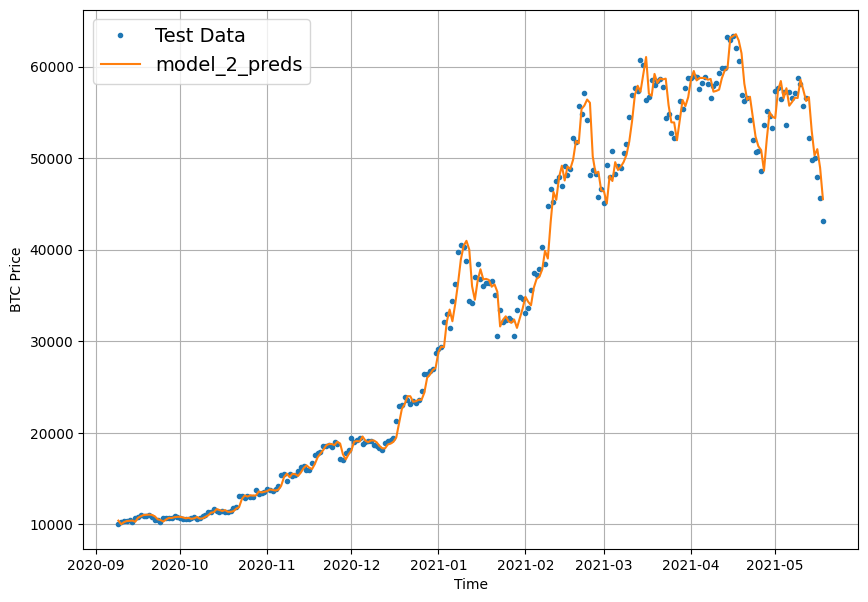

In [50]:
# Plot our function
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_2_preds , start = offset , format = "-" , label = "model_2_preds")

# Model 3 dense : Same as model 2 but , Window size = 30 , Horizon = 7

In [51]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
HORIZON = 7
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2751, 2751)

In [52]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [53]:
# Model 3 : Same as with model 1 but window size = 30 and horizon = 7
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_3_dense"
)
# Compile a model

model_3.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_3 = model_3.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 10s - loss: 4126.1694 - mae: 4126.1694

18/18 [==============================] - 1s 47ms/step - loss: 1842.3207 - mae: 1842.3207 - val_loss: 3679.1560 - val_mae: 3679.1560
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 619.8526 - mae: 619.8526

18/18 [==============================] - 1s 36ms/step - loss: 579.7554 - mae: 579.7554 - val_loss: 2668.1841 - val_mae: 2668.1841
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 425.7549 - mae: 425.7549

18/18 [==============================] - 1s 35ms/step - loss: 432.5642 - mae: 432.5642 - val_loss: 2315.9802 - val_mae: 2315.9802
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 456.4576 - mae: 456.4576

18/18 [==============================] - 1s 36ms/step - loss: 386.8998 - mae: 386.8998 - val_loss: 1972.8829 - val_mae: 1972.8829
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 355.8666 - mae: 355.8666 - val_loss: 2095.0513 - val_mae: 2095.0513
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 309.7606 - mae: 309.7606

18/18 [==============================] - 1s 35ms/step - loss: 336.5083 - mae: 336.5083 - val_loss: 1778.4043 - val_mae: 1778.4043
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 284.1083 - mae: 284.1083

18/18 [==============================] - 1s 45ms/step - loss: 313.0564 - mae: 313.0564 - val_loss: 1600.0404 - val_mae: 1600.0404
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 280.6519 - mae: 280.6519

18/18 [==============================] - 1s 53ms/step - loss: 307.4552 - mae: 307.4552 - val_loss: 1596.7668 - val_mae: 1596.7668
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 296.3171 - mae: 296.3171 - val_loss: 1723.5748 - val_mae: 1723.5748
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 265.2181 - mae: 265.2181

18/18 [==============================] - 1s 72ms/step - loss: 303.4909 - mae: 303.4909 - val_loss: 1527.5148 - val_mae: 1527.5148
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 278.8347 - mae: 278.8347

18/18 [==============================] - 1s 37ms/step - loss: 282.4448 - mae: 282.4448 - val_loss: 1524.4690 - val_mae: 1524.4690
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 282.0302 - mae: 282.0302 - val_loss: 1592.3197 - val_mae: 1592.3197
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 237.7554 - mae: 237.7554

18/18 [==============================] - 1s 36ms/step - loss: 281.3423 - mae: 281.3423 - val_loss: 1472.4094 - val_mae: 1472.4094
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 276.4681 - mae: 276.4681 - val_loss: 1473.5450 - val_mae: 1473.5450
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 270.0972 - mae: 270.0972 - val_loss: 1512.2738 - val_mae: 1512.2738
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 269.1104 - mae: 269.1104 - val_loss: 1536.7059 - val_mae: 1536.7059
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 266.9853 - mae: 266.9853 - val_loss: 1625.7316 - val_mae: 1625.7316
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 264.8853 - mae: 264.8853 - val_loss: 1537.2352 - val_mae: 1537.2352
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 260.9534 - mae: 260.9534 - val_loss: 1599.0476 - val_mae: 1599.0476
Epoch 20/100
18/18

18/18 [==============================] - 1s 37ms/step - loss: 257.9975 - mae: 257.9975 - val_loss: 1387.6066 - val_mae: 1387.6066
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 259.9474 - mae: 259.9474 - val_loss: 1434.2159 - val_mae: 1434.2159
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 279.0029 - mae: 279.0029 - val_loss: 1417.4642 - val_mae: 1417.4642
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 256.1216 - mae: 256.1216 - val_loss: 1459.6337 - val_mae: 1459.6337
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 249.3689 - mae: 249.3689 - val_loss: 1399.4039 - val_mae: 1399.4039
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 248.7212 - mae: 248.7212 - val_loss: 1388.5973 - val_mae: 1388.5973
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 247.1406 - mae: 247.1406 - val_loss: 1418.9591 - val_mae: 1418.9591
Epoch 29/100
18/18

18/18 [==============================] - 1s 36ms/step - loss: 243.6685 - mae: 243.6685 - val_loss: 1346.5499 - val_mae: 1346.5499
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 241.8297 - mae: 241.8297

18/18 [==============================] - 1s 36ms/step - loss: 244.1215 - mae: 244.1215 - val_loss: 1330.6433 - val_mae: 1330.6433
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 248.2283 - mae: 248.2283 - val_loss: 1406.8875 - val_mae: 1406.8875
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 245.0069 - mae: 245.0069 - val_loss: 1377.0348 - val_mae: 1377.0348
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 247.5122 - mae: 247.5122 - val_loss: 1348.9623 - val_mae: 1348.9623
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 243.8249 - mae: 243.8249 - val_loss: 1478.0917 - val_mae: 1478.0917
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 269.3171 - mae: 269.3171 - val_loss: 1408.9224 - val_mae: 1408.9224
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 246.3455 - mae: 246.3455 - val_loss: 1368.9415 - val_mae: 1368.9415
Epoch 39/100
18/18

18/18 [==============================] - 1s 38ms/step - loss: 235.0644 - mae: 235.0644 - val_loss: 1306.7725 - val_mae: 1306.7725
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 241.0948 - mae: 241.0948 - val_loss: 1322.0226 - val_mae: 1322.0226
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 237.9089 - mae: 237.9089 - val_loss: 1443.5453 - val_mae: 1443.5453
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 244.1441 - mae: 244.1441 - val_loss: 1367.5370 - val_mae: 1367.5370
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 245.1011 - mae: 245.1011 - val_loss: 1430.2156 - val_mae: 1430.2156
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 241.5823 - mae: 241.5823 - val_loss: 1328.5056 - val_mae: 1328.5056
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 255.4657 - mae: 255.4657 - val_loss: 1509.5245 - val_mae: 1509.5244
Epoch 50/100
18/18

18/18 [==============================] - 1s 36ms/step - loss: 233.4226 - mae: 233.4226 - val_loss: 1306.2289 - val_mae: 1306.2289
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 238.0910 - mae: 238.0910 - val_loss: 1326.8230 - val_mae: 1326.8230
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 235.5737 - mae: 235.5737 - val_loss: 1321.4365 - val_mae: 1321.4365
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 239.5322 - mae: 239.5322 - val_loss: 1361.8246 - val_mae: 1361.8246
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 236.2645 - mae: 236.2645 - val_loss: 1337.3477 - val_mae: 1337.3477
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 233.1902 - mae: 233.1902

18/18 [==============================] - 1s 36ms/step - loss: 232.2892 - mae: 232.2892 - val_loss: 1289.7875 - val_mae: 1289.7875
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 234.4142 - mae: 234.4142 - val_loss: 1299.1479 - val_mae: 1299.1479
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 216.4769 - mae: 216.4769

18/18 [==============================] - 1s 35ms/step - loss: 231.1425 - mae: 231.1425 - val_loss: 1286.9717 - val_mae: 1286.9717
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 230.4925 - mae: 230.4925 - val_loss: 1427.8955 - val_mae: 1427.8955
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 236.5018 - mae: 236.5018 - val_loss: 1313.6866 - val_mae: 1313.6866
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 234.8016 - mae: 234.8016 - val_loss: 1411.1743 - val_mae: 1411.1743
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 258.5194 - mae: 258.5194

18/18 [==============================] - 1s 42ms/step - loss: 232.4173 - mae: 232.4173 - val_loss: 1271.6829 - val_mae: 1271.6829
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 234.4142 - mae: 234.4142 - val_loss: 1327.4657 - val_mae: 1327.4657
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 229.9886 - mae: 229.9886 - val_loss: 1597.4919 - val_mae: 1597.4919
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 241.2545 - mae: 241.2545 - val_loss: 1273.9299 - val_mae: 1273.9299
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 234.4848 - mae: 234.4848 - val_loss: 1349.9581 - val_mae: 1349.9581
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 230.2073 - mae: 230.2073 - val_loss: 1596.9662 - val_mae: 1596.9662
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 235.0346 - mae: 235.0346 - val_loss: 1313.0900 - val_mae: 1313.0900
Epoch 71/100
18/18

18/18 [==============================] - 1s 50ms/step - loss: 230.1322 - mae: 230.1322 - val_loss: 1267.6176 - val_mae: 1267.6176
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 252.1732 - mae: 252.1732

18/18 [==============================] - 1s 45ms/step - loss: 226.1037 - mae: 226.1037 - val_loss: 1258.9399 - val_mae: 1258.9399
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 226.1918 - mae: 226.1918 - val_loss: 1333.8572 - val_mae: 1333.8572
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 227.3093 - mae: 227.3093 - val_loss: 1495.5867 - val_mae: 1495.5867
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 230.5918 - mae: 230.5918 - val_loss: 1272.8926 - val_mae: 1272.8926
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 230.1837 - mae: 230.1837 - val_loss: 1296.9049 - val_mae: 1296.9049
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 230.6690 - mae: 230.6690 - val_loss: 1278.4380 - val_mae: 1278.4380
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 235.2684 - mae: 235.2684 - val_loss: 1459.7595 - val_mae: 1459.7595
Epoch 80/100
18/18

18/18 [==============================] - 1s 35ms/step - loss: 224.0208 - mae: 224.0208 - val_loss: 1255.6565 - val_mae: 1255.6565
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 224.4493 - mae: 224.4493 - val_loss: 1271.9188 - val_mae: 1271.9188
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 224.4073 - mae: 224.4073 - val_loss: 1330.1903 - val_mae: 1330.1903
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 230.5002 - mae: 230.5002 - val_loss: 1340.4919 - val_mae: 1340.4919
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 227.2975 - mae: 227.2975 - val_loss: 1538.0621 - val_mae: 1538.0621
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 232.8050 - mae: 232.8050 - val_loss: 1331.2351 - val_mae: 1331.2351
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 238.8164 - mae: 238.8164 - val_loss: 1357.9365 - val_mae: 1357.9365
Epoch 91/100
18/18

In [54]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1255.6565 - mae: 1255.6565


[1255.656494140625, 1255.656494140625]

In [55]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 1ms/step


In [56]:
test_labels.shape , model_3_preds.shape

((551, 7), (551, 7))

In [57]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_3_preds))
model_3_results

{'mae': array([  566.0944  ,   408.71527 ,   269.03613 ,   422.4107  ,
          341.85043 ,   502.7399  ,   477.2256  ,   381.9285  ,
          444.3724  ,   581.43097 ,   795.8195  ,   703.06757 ,
          839.9068  ,   984.6215  ,   614.80133 ,   221.43645 ,
          226.4299  ,   283.08218 ,   296.94043 ,   300.31403 ,
          252.46066 ,   194.48605 ,   353.4543  ,   302.59946 ,
          282.69086 ,   153.11147 ,   133.50789 ,   146.9908  ,
          185.42445 ,   262.5529  ,   282.4197  ,   326.83594 ,
          420.581   ,   372.4615  ,   308.45795 ,   323.74777 ,
          327.78494 ,   233.45633 ,   188.23592 ,   238.47838 ,
          503.29205 ,   102.44796 ,   137.2449  ,    76.96087 ,
          125.69838 ,   147.03502 ,    66.85624 ,    86.91741 ,
           78.17216 ,   128.38992 ,   101.11454 ,   155.67564 ,
          184.51527 ,   199.14467 ,   252.07666 ,   373.91666 ,
          576.19836 ,   533.76404 ,   536.7407  ,   600.0978  ,
          357.80148 ,   214.5588 

# Make our evaluation function work for larger horizons

In [58]:
model_2_results["mae"].ndim

0

In [59]:
model_3_results["mae"].ndim

1

In [60]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1255.6565 - mae: 1255.6565


[1255.656494140625, 1255.656494140625]

In [61]:
tf.reduce_mean(model_3_results["mae"]).numpy()  # Burda tensorflowun model loss u verirken yaptıgını yaptık aslında tek bir deger aldık outputumuza bu yüzden modelin mae evaluate iyle aynı çıktı

1255.6566

In [62]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)   # Eğerki dimensionu 1 ve 1 den büyükse bizim outputumuzun mean alıyoruz değerlerde tek bir değer elde etmek icin.

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }


In [63]:
model_3_results = evaluate_preds( y_true = test_labels , y_pred = model_3_preds)
model_3_results

{'mae': 1255.6566,
 'mse': 5443498.5,
 'rmse': 1439.0149,
 'mape': 5.595024,
 'mase': 2.2343707}

# Hava tahmini yaparken gibi düşün. İlk cama çıkıp havaya baktıgında hava kapalıysa 1 saat içinde yağmur yağacağını tahmin edersin ve bunun doğruluğu çok yüksektir. Fakat cama çıkıp havaya bakıp önümüzdeki 5. günü tahmin ettiğinde %90 yanlış çıkacaktır. Horizon belirlerken bunu düşünebilirsin.

In [64]:
test_labels.shape

(551, 7)

In [65]:
mod = tf.reduce_mean(model_3_preds , axis = 1)
mod

<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 9359.311 ,  9153.212 ,  8950.0205,  9049.005 ,  8896.198 ,
        8965.315 ,  8843.418 ,  8598.946 ,  8475.349 ,  8454.964 ,
        8455.694 ,  8212.499 ,  8218.159 ,  8284.107 ,  7882.4966,
        7415.4146,  7343.117 ,  7134.0728,  7165.0347,  7159.107 ,
        7521.4443,  7455.281 ,  7738.797 ,  7686.497 ,  7690.629 ,
        7528.962 ,  7487.4805,  7351.839 ,  7453.04  ,  7523.649 ,
        7544.896 ,  7526.8115,  7556.328 ,  7414.5317,  7350.2563,
        7356.603 ,  7344.5063,  7261.665 ,  7193.6313,  7080.005 ,
        6730.5127,  7170.349 ,  7107.327 ,  7223.9897,  7329.758 ,
        7356.3623,  7236.8   ,  7320.1675,  7297.527 ,  7252.616 ,
        7175.636 ,  7370.5015,  7404.195 ,  7375.505 ,  7299.4507,
        7304.2427,  7081.811 ,  7241.7627,  7377.739 ,  7392.1216,
        7692.003 ,  7934.608 ,  8083.781 ,  8054.091 ,  8218.388 ,
        8167.393 ,  8215.892 ,  8313.885 ,  8697.333 ,  8744.667 ,
        8903.4

In [66]:
model_3_preds.shape

(551, 7)

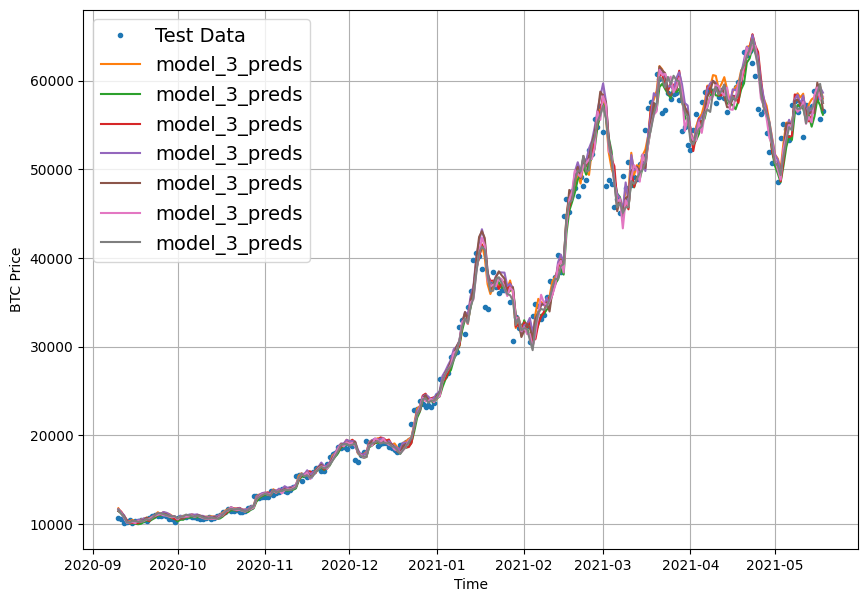

In [67]:
# Plot our function
# Plot ederken direkt x_test kullanmamamızın sebebi x_test datamız bütün tarihleri içeriyor daha train test diye ayrılmamış bir data. Bu yüzden biz test kısmını almak için test_windowsun lenghtini alıp ordan baslatıyoruz plot etmeye.
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_3_preds , start = offset , format = "-" , label = "model_3_preds")
# test_labels[ : , 0]   burda aslında her rowun 0. columnunu alıyoruz yani 7 tane prediction yaptıgımız horizonların hepsinin sadece 1. predictionunu alıyoruz.

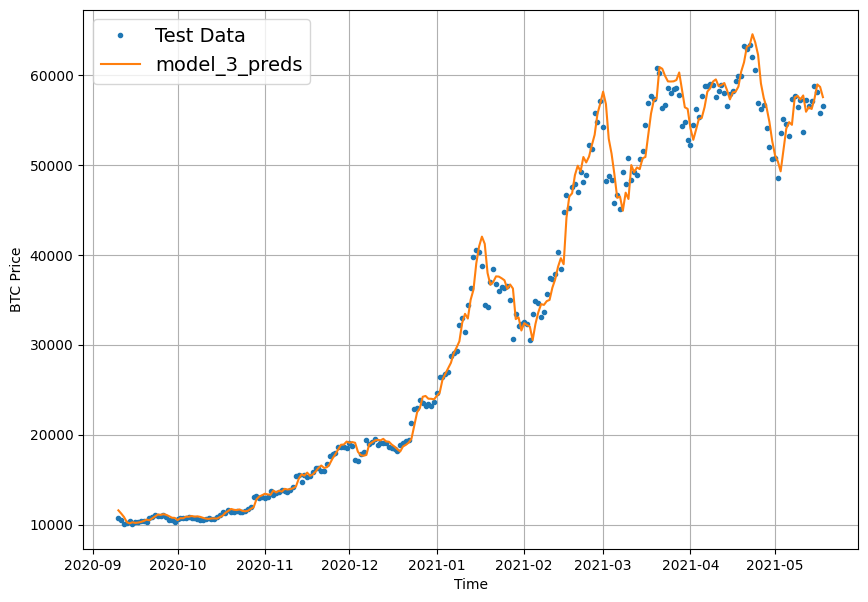

In [68]:
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = tf.reduce_mean(model_3_preds , axis = 1) , start = offset , format = "-" , label = "model_3_preds")
# Burda da aslında bütün 7 elementlik forecastlarımızın(horizon) tek tek average ını aldık. Yani aslında burda tam doğru değerleri görmüyoruz ama bize bit hint veriyor.

In [69]:
#

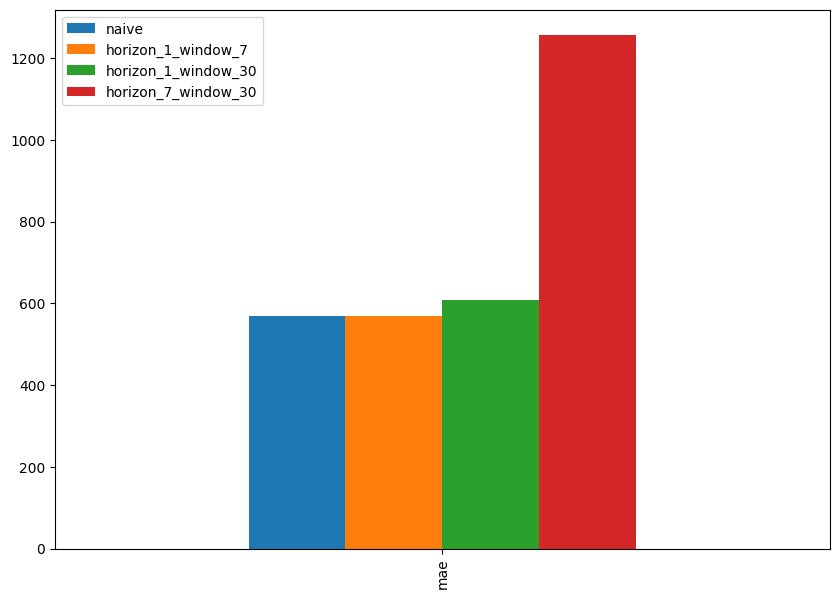

In [70]:
pd.DataFrame({
    "naive": naive_results["mae"] ,
    "horizon_1_window_7": model_1_results["mae"] ,
    "horizon_1_window_30": model_2_results["mae"] ,
    "horizon_7_window_30": model_3_results["mae"]
}  , index = ["mae"]
             ).plot(figsize = (10 , 7) , kind = "bar");

# Autocorrelation forecast incele

## You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestap) is typically close to the value at t (the current timestep). In other words , today's value is probably pretty close to yesterday's value. Of course, This isnt always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly) , a naive model will often get fairly good results. resource: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [71]:
HORIZON = 1 # We will predict 1 number
WINDOW_SIZE = 7 # We will use 7 elements for training

In [74]:
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)


(2780, 2780)

In [75]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows ,full_labels )
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# To use the Conv1D layer , we need an input shape of : (batch_size , timesteps , input_dim).

However our data isnt in that shape yet.

In [76]:
# Check data input shape
train_windows[0].shape  # (WINDOW_SIZE , )

(7,)

In [79]:
# Before we pass our data to the Conv1D layer , we have to reshape it in order to make sure it works.
example = tf.constant(train_windows[0])
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [78]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)) # Add extra dimension for input_dim
# lambda x: tf.expand_dims(x, axis=1): Bu Lambda katmanı bir işlevi tanımlar. İşlev, bir giriş tensörünü (x) alır ve bu tensörü işler. İşlev, giriş tensörünü bir boyut eklemek için tf.expand_dims fonksiyonunu kullanır. Bu işlev, giriş tensörünün her bir öğesini (örneğin bir veri noktasını) işler ve bu öğelerin her birini önceki boyutları koruyarak belirtilen eksen (axis=1) boyunca yeni bir boyut ekler.
# layers.Lambda: Bu, Keras'ın katmanlarını tanımlamak için kullanılan bir sınıftır. Lambda katmanı, özel bir işlevi (fonksiyonu) uygulamak için kullanılır. Bu işlev, katmanın giriş verilerini dönüştürmek veya manipüle etmek için kullanılır.

# Direkt tf.expand_dims kullanmayıp lambda layer kullanmamızın sebebi lambda layerı modelimize direkt ekleyebilecek olmamız

In [80]:
# Test out our lambda layer
print(f"Original shape : {example.shape} ")  # ( WINDOW_SIZE , )
print(f"Expanded shape : { expand_dims_layer(example).shape }")  # ( WINDOW_SIZE , input_dim )

Original shape : (7,) 
Expanded shape : (7, 1)


### NOTE: kernel_size defines the size of the sliding window.

The filters parameters is just how many different windows you will have (All of them with the same length , which is kernel_size) . How many different results or channels you want to produce.

When you use filters = 100 and kernel_size = 4 , you are creating 100 different filters , each of them with length 4. The result will bring 100 different convolutions.

### NOTE: Conv1D katmanları, girdi sıralı verileri üzerinde kaydırma işlemleri gerçekleştirir ve bu verilerdeki özellikleri çıkarır. Ardışık Conv1D katmanlarını bir araya getirerek daha karmaşık özellikleri yakalayabilirsiniz. Ancak sıralı verilerde tipik olarak Conv1D katmanları arasına pooling katmanları eklemeye gerek yoktur, çünkü Conv1D katmanları zaten sıralı verilerdeki özellikleri öğrenmek için yeterince yeteneklidir.

In [81]:
# Create a model
tf.random.set_seed(42)
model_4 = tf.keras.Sequential(
    [
        #expand_dims_layer ,  direkt bunu kullanabiliriz practice amaçlı baştan yazıcaz
        layers.Lambda(lambda x : tf.expand_dims(x , axis = 1)) ,
        layers.Conv1D(filters = 128 , activation = "relu" , kernel_size = 5 , padding = "causal" ) , # kernel_size = 5 dedigimizde strides = 1 oldugu icin default olarak windowun icine girip ilk 5 ine bakıyor sonrasında ilk elementi atlayıp sonraki 5 ine bakıyor böyle devam ediyor.
        # padding = causal olmasının sebebi causal olunca "model shouldnt violate the temporal order " bizim datamızda da temporal bir yapı oldugu icin casual kullanıyoruz.
        layers.Dense(HORIZON)
    ]  , name = "model_4_conv1d"
)
# Compile a model
model_4.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_4.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 3098.3970 

18/18 [==============================] - 3s 123ms/step - loss: 2939.1069 - val_loss: 9401.7754
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1141.0112

18/18 [==============================] - 1s 68ms/step - loss: 593.7313 - val_loss: 2585.3591
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 359.7650

18/18 [==============================] - 1s 56ms/step - loss: 279.5861 - val_loss: 1453.3273
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 264.3005

18/18 [==============================] - 1s 46ms/step - loss: 201.1044 - val_loss: 1137.4396
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 194.1568

18/18 [==============================] - 1s 48ms/step - loss: 194.1568 - val_loss: 1084.9512
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 149.7083

18/18 [==============================] - 1s 67ms/step - loss: 189.8478 - val_loss: 1057.3912
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 231.4992

18/18 [==============================] - 1s 48ms/step - loss: 189.8173 - val_loss: 1043.9156
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 185.3460 - val_loss: 1045.8899
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 183.4804 - val_loss: 1061.9657
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 203.9182

18/18 [==============================] - 1s 51ms/step - loss: 181.7125 - val_loss: 1025.1740
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 209.3086

18/18 [==============================] - 1s 51ms/step - loss: 180.0496 - val_loss: 994.2544
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 179.1856 - val_loss: 1001.2327
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 174.5341 - val_loss: 1002.7127
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 200.4632

18/18 [==============================] - 1s 48ms/step - loss: 172.1933 - val_loss: 991.8156
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 167.9310

18/18 [==============================] - 1s 51ms/step - loss: 172.5840 - val_loss: 944.7234
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 169.8630

18/18 [==============================] - 1s 48ms/step - loss: 166.5902 - val_loss: 934.4406
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 164.1750 - val_loss: 978.0779
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 164.9526

18/18 [==============================] - 1s 49ms/step - loss: 162.7075 - val_loss: 927.6738
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 159.2771 - val_loss: 936.1882
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 163.0186

18/18 [==============================] - 1s 67ms/step - loss: 156.7550 - val_loss: 870.6464
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 221.0639

18/18 [==============================] - 1s 71ms/step - loss: 153.7785 - val_loss: 865.6824
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 201.9304

18/18 [==============================] - 1s 54ms/step - loss: 150.3196 - val_loss: 852.9718
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 170.7874

18/18 [==============================] - 1s 48ms/step - loss: 147.6545 - val_loss: 838.3715
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 145.6897 - val_loss: 839.1328
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 146.6822

18/18 [==============================] - 1s 75ms/step - loss: 141.6622 - val_loss: 813.9192
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 138.9346

18/18 [==============================] - 1s 49ms/step - loss: 139.3517 - val_loss: 771.5084
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 198.8119

18/18 [==============================] - 1s 48ms/step - loss: 137.0947 - val_loss: 769.0948
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 131.0262

18/18 [==============================] - 1s 47ms/step - loss: 134.1013 - val_loss: 740.6900
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 135.0260 - val_loss: 743.2362
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 136.8504 - val_loss: 917.3115
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 166.4622

18/18 [==============================] - 1s 46ms/step - loss: 139.6099 - val_loss: 721.5714
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 110.9853

18/18 [==============================] - 1s 47ms/step - loss: 128.4580 - val_loss: 701.9133
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 156.1005

18/18 [==============================] - 1s 48ms/step - loss: 128.6316 - val_loss: 694.1646
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 128.8677

18/18 [==============================] - 1s 48ms/step - loss: 124.8305 - val_loss: 690.3306
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 114.1536

18/18 [==============================] - 1s 49ms/step - loss: 122.8943 - val_loss: 687.7884
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 125.2293 - val_loss: 701.1524
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 154.2285

18/18 [==============================] - 1s 59ms/step - loss: 121.5226 - val_loss: 667.8638
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 117.8356

18/18 [==============================] - 1s 69ms/step - loss: 119.5449 - val_loss: 654.3289
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 119.5558 - val_loss: 677.7635
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 118.7181

18/18 [==============================] - 1s 62ms/step - loss: 118.1897 - val_loss: 640.5757
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 113.2518

18/18 [==============================] - 1s 50ms/step - loss: 118.7710 - val_loss: 637.1161
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 115.6705

18/18 [==============================] - 1s 74ms/step - loss: 120.1720 - val_loss: 633.3547
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 117.4876 - val_loss: 649.3743
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 120.0597 - val_loss: 637.8159
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 83.4283

18/18 [==============================] - 1s 47ms/step - loss: 114.8428 - val_loss: 619.6744
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 89.5446

18/18 [==============================] - 1s 48ms/step - loss: 114.7194 - val_loss: 619.4094
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 117.9403 - val_loss: 685.8187
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1564 - val_loss: 664.6820
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 171.2061

18/18 [==============================] - 1s 47ms/step - loss: 115.6318 - val_loss: 616.0593
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 134.6512

18/18 [==============================] - 1s 48ms/step - loss: 113.3180 - val_loss: 606.5568
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7694 - val_loss: 622.2740
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2879 - val_loss: 610.0184
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4971 - val_loss: 629.2906
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9703 - val_loss: 627.8371
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 133.0710

18/18 [==============================] - 1s 48ms/step - loss: 113.1626 - val_loss: 601.5362
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1169 - val_loss: 726.7819
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 128.5185 - val_loss: 615.8487
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4643 - val_loss: 637.0854
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 80.8930

18/18 [==============================] - 1s 48ms/step - loss: 110.8768 - val_loss: 599.7577
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0787 - val_loss: 623.7609
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1984 - val_loss: 614.2011
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 80.1588

18/18 [==============================] - 1s 48ms/step - loss: 111.5619 - val_loss: 588.6735
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 93.6348

18/18 [==============================] - 1s 52ms/step - loss: 110.7544 - val_loss: 588.3486
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1558 - val_loss: 653.3832
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 116.4712 - val_loss: 619.8038
Epoch 66/100
18/18 [==============================] - ETA: 0s - loss: 111.5062

18/18 [==============================] - 1s 69ms/step - loss: 111.5062 - val_loss: 585.4020
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5586 - val_loss: 653.6619
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 116.8700 - val_loss: 633.9909
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3673 - val_loss: 650.9153
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 122.6234 - val_loss: 613.0107
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 110.1553 - val_loss: 603.1926
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1825 - val_loss: 596.4418
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 122.1964

18/18 [==============================] - 1s 55ms/step - loss: 110.4169 - val_loss: 583.6841
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 161.4052

18/18 [==============================] - 1s 47ms/step - loss: 110.5654 - val_loss: 581.3423
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9849 - val_loss: 619.3271
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9013 - val_loss: 583.1833
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2699 - val_loss: 604.6359
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5308 - val_loss: 584.2998
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6378 - val_loss: 594.2308
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 115.6100 - val_loss: 605.4747
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9912 - val_loss: 591.2568
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9915 - val_loss: 596.8126
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 11

18/18 [==============================] - 1s 47ms/step - loss: 111.1649 - val_loss: 575.4478
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0082 - val_loss: 590.9214
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6211 - val_loss: 660.6215
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 113.7138 - val_loss: 604.2382
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0517 - val_loss: 577.5523
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1108 - val_loss: 578.7656
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5824 - val_loss: 748.9280
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 115.0223

18/18 [==============================] - 1s 72ms/step - loss: 112.0248 - val_loss: 573.9161
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0692 - val_loss: 601.9495
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4547 - val_loss: 608.9130
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 144.8523

18/18 [==============================] - 1s 47ms/step - loss: 108.5125 - val_loss: 572.5038
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 134.9720

18/18 [==============================] - 1s 48ms/step - loss: 108.6073 - val_loss: 572.3451
Epoch 96/100
 1/18 [>.............................] - ETA: 0s - loss: 114.1293

18/18 [==============================] - 1s 49ms/step - loss: 107.3269 - val_loss: 571.0544
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 107.1453 - val_loss: 578.7109
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 107.1279 - val_loss: 574.5629
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 151.6095

18/18 [==============================] - 1s 48ms/step - loss: 107.0056 - val_loss: 569.7844
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9827 - val_loss: 608.1647


In [82]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Evaluate our model
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 8ms/step - loss: 608.1647


608.1647338867188

In [84]:
# Load back in the best performing Conv1D model and re-evaluate it
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 569.7844


569.784423828125

In [85]:
test_windows.shape , test_labels.shape

((556, 7), (556, 1))

In [92]:
model_4_preds = model_4.predict(test_windows)
test_labels.shape , tf.squeeze(model_4_preds).shape

18/18 [==============================] - 0s 2ms/step


((556, 1), TensorShape([556]))

In [95]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_4_preds))
model_4_results

{'mae': 569.7844,
 'mse': 1180381.0,
 'rmse': 1086.4534,
 'mape': 2.5569212,
 'mase': 1.0009534}

# Model 5: RNN (With LSTM)

We will use the same data we created previously.

In [98]:
tf.random.set_seed(42)
# Lets build a LSTM model with the Functional API
inputs = layers.Input(shape = WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1))(inputs)  # Because LSTM layers should take input with shape : A 3D tensor with shape [batch, timesteps, feature].
#x = layers.LSTM(128 , return_sequences = True)(x)
x = layers.LSTM(128 , activation = "relu")(x)  # Default hyperparameterlarla modelimiz çok kötü mae verdi bu yüzden tuning yapacağız.
#x = layers.Dense(32 , activation = "relu")(x)  Bunlarla beraber denedik modelimiz yine improve olmadı
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs , outputs , name = "model_5_lstm")


In [99]:
# Compile a model
model_5.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_5.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 2827.2527

18/18 [==============================] - 6s 218ms/step - loss: 2809.6426 - val_loss: 13187.1836
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 1179.4293

18/18 [==============================] - 2s 144ms/step - loss: 1156.9624 - val_loss: 1082.5577
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 264.1586 - val_loss: 1340.1111
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 211.2040 - val_loss: 1118.3075
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 196.4130 - val_loss: 1085.1484
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 194.5448

18/18 [==============================] - 2s 139ms/step - loss: 196.3681 - val_loss: 1074.9681
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 191.4444 - val_loss: 1078.4978
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 188.5200 - val_loss: 1082.9906
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 186.3746

18/18 [==============================] - 3s 175ms/step - loss: 186.4035 - val_loss: 1073.5898
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 182.0085

18/18 [==============================] - 3s 176ms/step - loss: 185.3737 - val_loss: 1055.1936
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 184.7131

18/18 [==============================] - 3s 155ms/step - loss: 184.3775 - val_loss: 1044.6117
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 183.0506

18/18 [==============================] - 2s 143ms/step - loss: 183.0506 - val_loss: 1030.8636
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 181.3165

18/18 [==============================] - 2s 142ms/step - loss: 180.5606 - val_loss: 1022.5607
Epoch 14/100
18/18 [==============================] - 0s 10ms/step - loss: 178.5388 - val_loss: 1040.0056
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 181.4893

18/18 [==============================] - 3s 185ms/step - loss: 178.2825 - val_loss: 1015.1287
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 172.6341

18/18 [==============================] - 3s 182ms/step - loss: 175.0086 - val_loss: 980.1350
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 173.2491 - val_loss: 1043.6371
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 172.6305

18/18 [==============================] - 2s 139ms/step - loss: 172.6305 - val_loss: 971.3555
Epoch 19/100
18/18 [==============================] - 0s 10ms/step - loss: 169.5726 - val_loss: 1030.8806
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 168.0798

18/18 [==============================] - 2s 137ms/step - loss: 169.0459 - val_loss: 933.0262
Epoch 21/100
18/18 [==============================] - 0s 11ms/step - loss: 165.1195 - val_loss: 937.5759
Epoch 22/100
18/18 [==============================] - 0s 10ms/step - loss: 163.2517 - val_loss: 953.3150
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 160.7762 - val_loss: 939.5884
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 160.6410

18/18 [==============================] - 2s 137ms/step - loss: 158.9003 - val_loss: 895.7181
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 157.6032

18/18 [==============================] - 4s 221ms/step - loss: 156.7360 - val_loss: 876.8865
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 159.2399

18/18 [==============================] - 2s 140ms/step - loss: 154.6050 - val_loss: 874.4963
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 152.3921

18/18 [==============================] - 2s 136ms/step - loss: 152.2802 - val_loss: 862.9894
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 150.0886

18/18 [==============================] - 2s 134ms/step - loss: 150.2645 - val_loss: 838.4663
Epoch 29/100
18/18 [==============================] - 0s 9ms/step - loss: 150.3628 - val_loss: 849.7745
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 151.9173 - val_loss: 863.8986
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 147.1959

18/18 [==============================] - 2s 135ms/step - loss: 146.9790 - val_loss: 804.4105
Epoch 32/100
18/18 [==============================] - 0s 10ms/step - loss: 143.9420 - val_loss: 808.5238
Epoch 33/100
18/18 [==============================] - 0s 11ms/step - loss: 141.7402 - val_loss: 807.4001
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 141.0302

18/18 [==============================] - 3s 183ms/step - loss: 141.2492 - val_loss: 778.9286
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 138.9684

18/18 [==============================] - 5s 288ms/step - loss: 138.9684 - val_loss: 770.7551
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 137.8984

18/18 [==============================] - 2s 139ms/step - loss: 138.7271 - val_loss: 760.2426
Epoch 37/100
15/18 [========================>.....] - ETA: 0s - loss: 137.6775

18/18 [==============================] - 3s 156ms/step - loss: 135.2159 - val_loss: 751.3673
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 135.5091

18/18 [==============================] - 3s 175ms/step - loss: 134.2941 - val_loss: 741.8281
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 135.0755 - val_loss: 744.8611
Epoch 40/100
18/18 [==============================] - 0s 10ms/step - loss: 136.0920 - val_loss: 771.8120
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 134.1927

18/18 [==============================] - 2s 136ms/step - loss: 133.3107 - val_loss: 728.6159
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 131.4171

18/18 [==============================] - 2s 132ms/step - loss: 130.2173 - val_loss: 715.6391
Epoch 43/100
17/18 [===========================>..] - ETA: 0s - loss: 129.2521

18/18 [==============================] - 3s 173ms/step - loss: 129.4764 - val_loss: 709.5999
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 128.7522

18/18 [==============================] - 3s 169ms/step - loss: 128.7522 - val_loss: 703.4205
Epoch 45/100
17/18 [===========================>..] - ETA: 0s - loss: 126.7580

18/18 [==============================] - 3s 153ms/step - loss: 126.5751 - val_loss: 698.5700
Epoch 46/100
18/18 [==============================] - 0s 9ms/step - loss: 128.0587 - val_loss: 713.6754
Epoch 47/100
18/18 [==============================] - 0s 10ms/step - loss: 128.1322 - val_loss: 704.6318
Epoch 48/100
18/18 [==============================] - ETA: 0s - loss: 126.5966

18/18 [==============================] - 2s 136ms/step - loss: 126.5966 - val_loss: 685.8857
Epoch 49/100
18/18 [==============================] - 0s 9ms/step - loss: 124.1479 - val_loss: 688.7438
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 128.1936 - val_loss: 719.2468
Epoch 51/100
18/18 [==============================] - 0s 10ms/step - loss: 124.9505 - val_loss: 723.4039
Epoch 52/100
18/18 [==============================] - ETA: 0s - loss: 123.0496

18/18 [==============================] - 2s 133ms/step - loss: 123.0496 - val_loss: 668.0685
Epoch 53/100
17/18 [===========================>..] - ETA: 0s - loss: 122.6818

18/18 [==============================] - 3s 180ms/step - loss: 122.2202 - val_loss: 665.7087
Epoch 54/100
18/18 [==============================] - 0s 14ms/step - loss: 122.6481 - val_loss: 679.1755
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 122.4431

18/18 [==============================] - 3s 172ms/step - loss: 121.1554 - val_loss: 654.4796
Epoch 56/100
18/18 [==============================] - ETA: 0s - loss: 124.1156

18/18 [==============================] - 2s 134ms/step - loss: 124.1156 - val_loss: 649.8510
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 125.4279 - val_loss: 668.3840
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 119.3065

18/18 [==============================] - 2s 137ms/step - loss: 119.3065 - val_loss: 646.3565
Epoch 59/100
16/18 [=========================>....] - ETA: 0s - loss: 118.2019

18/18 [==============================] - 2s 134ms/step - loss: 118.5494 - val_loss: 645.5139
Epoch 60/100
15/18 [========================>.....] - ETA: 0s - loss: 121.1628

18/18 [==============================] - 2s 145ms/step - loss: 119.4940 - val_loss: 640.8028
Epoch 61/100
18/18 [==============================] - 0s 14ms/step - loss: 118.1437 - val_loss: 656.2884
Epoch 62/100
18/18 [==============================] - 0s 13ms/step - loss: 117.9561 - val_loss: 652.6001
Epoch 63/100
17/18 [===========================>..] - ETA: 0s - loss: 119.9193

18/18 [==============================] - 3s 199ms/step - loss: 119.6297 - val_loss: 630.9322
Epoch 64/100
18/18 [==============================] - 0s 9ms/step - loss: 116.5200 - val_loss: 654.5172
Epoch 65/100
17/18 [===========================>..] - ETA: 0s - loss: 119.3164

18/18 [==============================] - 2s 132ms/step - loss: 118.1183 - val_loss: 630.5452
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 116.4792 - val_loss: 640.8341
Epoch 67/100
10/18 [===============>..............] - ETA: 0s - loss: 113.3963

18/18 [==============================] - 2s 130ms/step - loss: 118.4459 - val_loss: 626.3695
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 119.4302 - val_loss: 633.6945
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 122.0580 - val_loss: 643.3107
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 116.4378

18/18 [==============================] - 2s 132ms/step - loss: 117.7630 - val_loss: 624.7354
Epoch 71/100
18/18 [==============================] - 0s 9ms/step - loss: 115.5309 - val_loss: 641.3153
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 116.4842

18/18 [==============================] - 3s 181ms/step - loss: 118.0591 - val_loss: 618.8515
Epoch 73/100
17/18 [===========================>..] - ETA: 0s - loss: 115.7066

18/18 [==============================] - 3s 170ms/step - loss: 114.6379 - val_loss: 616.4224
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 114.6908 - val_loss: 618.0596
Epoch 75/100
18/18 [==============================] - 0s 10ms/step - loss: 114.6586 - val_loss: 660.3349
Epoch 76/100
18/18 [==============================] - 0s 9ms/step - loss: 115.5757 - val_loss: 646.9772
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 117.8240 - val_loss: 701.5846
Epoch 78/100
18/18 [==============================] - 0s 9ms/step - loss: 119.3835 - val_loss: 634.7269
Epoch 79/100
18/18 [==============================] - ETA: 0s - loss: 114.7157

18/18 [==============================] - 2s 135ms/step - loss: 114.7157 - val_loss: 604.9213
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 112.4668 - val_loss: 608.4171
Epoch 81/100
18/18 [==============================] - 0s 9ms/step - loss: 113.2612 - val_loss: 634.7737
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 115.3393

18/18 [==============================] - 2s 132ms/step - loss: 115.3393 - val_loss: 602.6549
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 113.3514 - val_loss: 620.4573
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 113.5768 - val_loss: 613.1875
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 113.7137 - val_loss: 668.0131
Epoch 86/100
18/18 [==============================] - 0s 10ms/step - loss: 117.6941 - val_loss: 622.7452
Epoch 87/100
18/18 [==============================] - 0s 9ms/step - loss: 115.0006 - val_loss: 602.6848
Epoch 88/100
18/18 [==============================] - ETA: 0s - loss: 113.1269

18/18 [==============================] - 3s 180ms/step - loss: 113.1269 - val_loss: 599.9581
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 114.1503 - val_loss: 634.6060
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 118.0327 - val_loss: 643.0299
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 114.4202 - val_loss: 605.9993
Epoch 92/100
16/18 [=========================>....] - ETA: 0s - loss: 111.6549

18/18 [==============================] - 2s 128ms/step - loss: 112.3245 - val_loss: 592.4485
Epoch 93/100
18/18 [==============================] - 0s 9ms/step - loss: 112.6763 - val_loss: 602.5300
Epoch 94/100
18/18 [==============================] - 0s 23ms/step - loss: 111.0160 - val_loss: 594.1141
Epoch 95/100
18/18 [==============================] - 0s 26ms/step - loss: 110.6823 - val_loss: 598.7255
Epoch 96/100
18/18 [==============================] - 0s 25ms/step - loss: 111.1432 - val_loss: 597.0051
Epoch 97/100
18/18 [==============================] - 0s 23ms/step - loss: 110.8827 - val_loss: 599.6064
Epoch 98/100
16/18 [=========================>....] - ETA: 0s - loss: 111.4464

18/18 [==============================] - 5s 284ms/step - loss: 110.1498 - val_loss: 589.1149
Epoch 99/100
10/18 [===============>..............] - ETA: 0s - loss: 108.8506

18/18 [==============================] - 4s 211ms/step - loss: 110.4392 - val_loss: 588.2146
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 115.4780 - val_loss: 602.3481


In [100]:
# Load in best version of model_5 and evaluate it
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm/")
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 1s 7ms/step - loss: 588.2147


588.2146606445312

In [102]:
model_5_preds = model_5.predict(test_windows)
model_5_preds.shape

18/18 [==============================] - 0s 6ms/step


(556, 1)

In [103]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_5_preds))
model_5_results

{'mae': 588.2147,
 'mse': 1231932.0,
 'rmse': 1109.9243,
 'mape': 2.6476512,
 'mase': 1.0333303}

### Because neural networks are such powerful algorihtms , they can be used for almost any problem , however , that doesnt mean they will achieve performant or usable results.